In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [5]:
datos_allPairs = pd.read_csv('resultados_allPairsShortestPath.csv')

datos_allPairs2 = pd.read_csv('resultados_allPairsShortestPath2.csv')


In [6]:
datos_allPairs

,Nodos,Aristas,Tiempo_Segundos
0,100,990,0.028278
1,100,990,0.027458
2,100,990,0.030768
3,100,990,0.028810
4,100,990,0.027060
...,...,...,...
70,500,24950,17.712736
71,500,24950,17.664659
72,500,24950,17.629928
73,500,24950,17.128880


In [7]:
datos_allPairs
datos_allPairs_prom =datos_allPairs.groupby('Nodos').mean().reset_index()
datos_allPairs_prom

,Nodos,Aristas,Tiempo_Segundos
0,100,990.0,0.027527
1,200,3980.0,0.341799
2,300,8970.0,2.215547
3,400,15960.0,7.045085
4,500,24950.0,17.372315


In [8]:
datos_allPairs2_prom =datos_allPairs2.groupby('Nodos').mean().reset_index()
datos_allPairs2_prom

,Nodos,Aristas,Tiempo_Segundos
0,100,990.0,0.004079
1,200,3980.0,0.026898
2,300,8970.0,0.084093
3,400,15960.0,0.238626
4,500,24950.0,0.454883


/tmp/ipykernel_7941/652715305.py:38: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


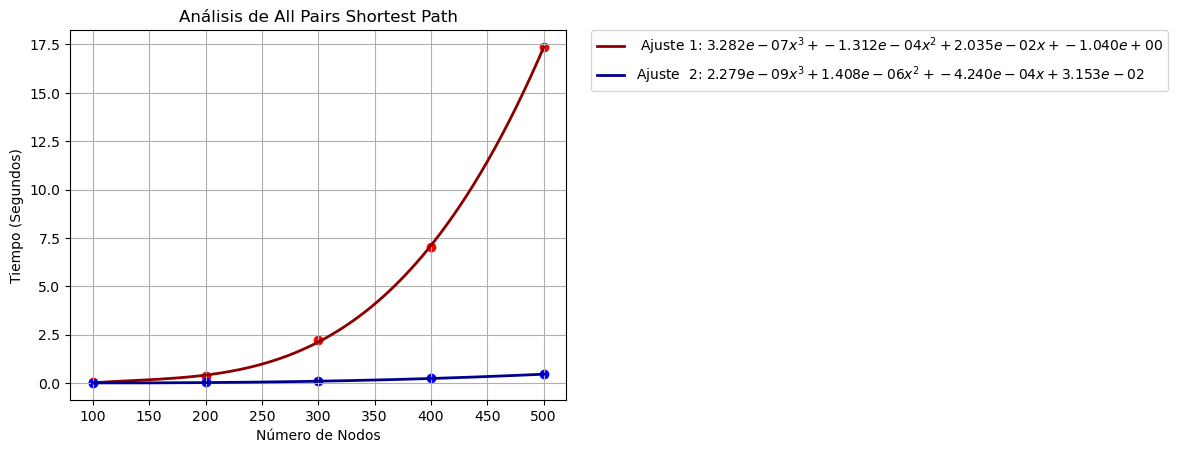

In [9]:
x1=datos_allPairs_prom['Nodos'].values
y1=datos_allPairs_prom['Tiempo_Segundos'].values

x2=datos_allPairs2_prom['Nodos'].values
y2=datos_allPairs2_prom['Tiempo_Segundos'].values


plt.scatter(x1, y1, color='red')
plt.scatter(x2, y2, color='blue')

coeficientes_cubicos1 = np.polyfit(x1, y1, 3)
coeficientes_cubicos2 = np.polyfit(x2, y2, 3)

funcion_cubica1 = np.poly1d(coeficientes_cubicos1)
funcion_cubica2 = np.poly1d(coeficientes_cubicos2)

x_curva = np.linspace(x1.min(), x1.max(), 500)

y1_curva = funcion_cubica1(x_curva)
y2_curva =funcion_cubica2(x_curva)

c1 = coeficientes_cubicos1
label_funcion1 = f' Ajuste 1: ${c1[0]:.3e}x^3 + {c1[1]:.3e}x^2 + {c1[2]:.3e}x + {c1[3]:.3e}$'

c2 = coeficientes_cubicos2
label_funcion2 = f'Ajuste  2: ${c2[0]:.3e}x^3 + {c2[1]:.3e}x^2 + {c2[2]:.3e}x + {c2[3]:.3e}$'


plt.plot(x_curva, y1_curva, color='darkred', linewidth=2, label=label_funcion1)

plt.plot(x_curva, y2_curva, color='darkblue', linewidth=2, label=label_funcion2)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.title('Análisis de All Pairs Shortest Path')
plt.xlabel('Número de Nodos')
plt.ylabel('Tiempo (Segundos)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
datos_extrapolation = datos_allPairs_prom[datos_allPairs_prom['Nodos'] != 500]
datos_extrapolation2 = datos_allPairs2_prom[datos_allPairs_prom['Nodos'] != 500]



datos_extrapolation

,Nodos,Aristas,Tiempo_Segundos
0,100,990.0,0.027527
1,200,3980.0,0.341799
2,300,8970.0,2.215547
3,400,15960.0,7.045085


/tmp/ipykernel_7941/3903346545.py:51: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


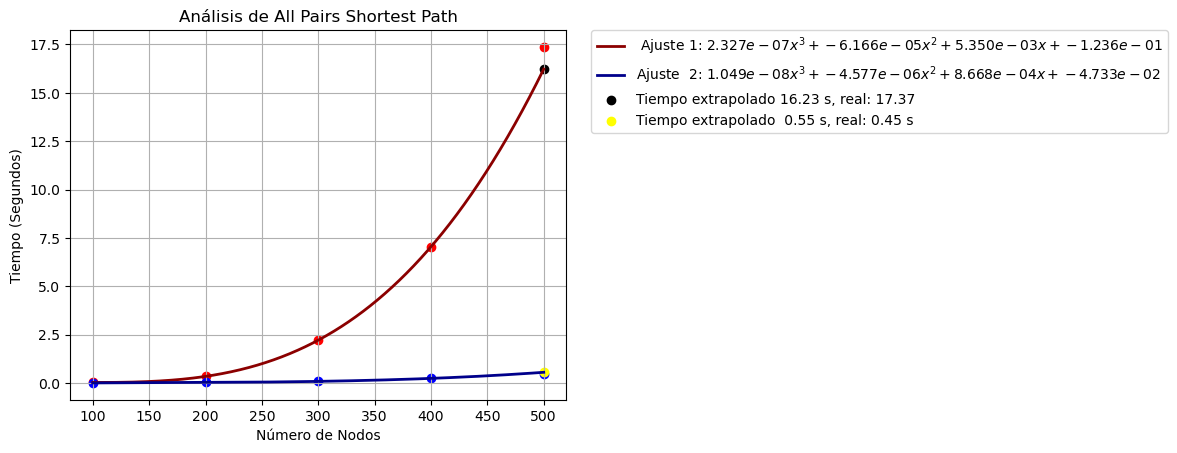

In [16]:

x1_extrapolation=datos_extrapolation['Nodos'].values
y1_extrapolation=datos_extrapolation['Tiempo_Segundos'].values

y2_extrapolation=datos_extrapolation2['Tiempo_Segundos'].values


plt.scatter(x1, y1, color='red')
plt.scatter(x2, y2, color='blue')

coeficientes_cubicos1_extrapolation = np.polyfit(x1_extrapolation, y1_extrapolation, 3)
coeficientes_cubicos2_extrapolation = np.polyfit(x1_extrapolation, y2_extrapolation, 3)

funcion_cubica1_extrapolation = np.poly1d(coeficientes_cubicos1_extrapolation)
funcion_cubica2_extrapolation = np.poly1d(coeficientes_cubicos2_extrapolation)

x_curva_extrapolation = np.linspace(x1_extrapolation.min(), 500, 500)
y1_curva_extrapolation = funcion_cubica1_extrapolation(x_curva_extrapolation)

y2_curva_extrapolation = funcion_cubica2_extrapolation(x_curva_extrapolation)



#Etiquetas para la gráfica
c1_extrapolation = coeficientes_cubicos1_extrapolation
label_funcion1_extrapolation = f' Ajuste 1: ${c1_extrapolation[0]:.3e}x^3 + {c1_extrapolation[1]:.3e}x^2 + {c1_extrapolation[2]:.3e}x + {c1_extrapolation[3]:.3e}$'

c2_extrapolation = coeficientes_cubicos2_extrapolation
label_funcion2_extrapolation = f'Ajuste  2: ${c2_extrapolation[0]:.3e}x^3 + {c2_extrapolation[1]:.3e}x^2 + {c2_extrapolation[2]:.3e}x + {c2_extrapolation[3]:.3e}$'

plt.plot(x_curva_extrapolation, y1_curva_extrapolation, color='darkred', linewidth=2, label=label_funcion1_extrapolation)
plt.plot(x_curva_extrapolation, y2_curva_extrapolation, color= 'darkblue', linewidth=2, label=label_funcion2_extrapolation)



#putno de extrapolacion
valor_real1 = datos_allPairs_prom[datos_allPairs_prom['Nodos'] == 500]['Tiempo_Segundos'].values[0]
valor_extrapolado1 = funcion_cubica1_extrapolation(500)

valor_real2 = datos_allPairs2_prom[datos_allPairs2_prom['Nodos'] == 500]['Tiempo_Segundos'].values[0]
valor_extrapolado2 = funcion_cubica2_extrapolation(500)
plt.scatter(500, valor_extrapolado1, color='black', label=f'Tiempo extrapolado {valor_extrapolado1:.2f} s, real: {valor_real1:.2f}')
plt.scatter(500, valor_extrapolado2, color='yellow', label=f'Tiempo extrapolado  {valor_extrapolado2:.2f} s, real: {valor_real2:.2f} s')



plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Análisis de All Pairs Shortest Path')
plt.xlabel('Número de Nodos')
plt.ylabel('Tiempo (Segundos)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:


print('Para all Pairs shortest path ejecutando el algoritmo de Dijkstra para cada nodo:')
print(f'EL TIEMPO REAL PARA 500 NODOS ES: {valor_real1} segundos')
print(f'EL TIEMPO EXTRAPOLADO PARA 500 NODOS ES: {valor_extrapolado1} segundos')

Para all Pairs shortest path ejecutando el algoritmo de Dijkstra para cada nodo:
EL TIEMPO REAL PARA 500 NODOS ES: 17.372315399999998 segundos
EL TIEMPO EXTRAPOLADO PARA 500 NODOS ES: 16.22672653333335 segundos


In [ ]:


print('Para all Pairs shortest path con solución dinámica:')
print(f'EL TIEMPO REAL PARA 500 NODOS ES: {valor_real2} segundos')
print(f'EL TIEMPO EXTRAPOLADO PARA 500 NODOS ES: {valor_extrapolado2} segundos')

Para all Pairs shortest path con solución dinámica:
EL TIEMPO REAL PARA 500 NODOS ES: 0.45488266666666666 segundos
EL TIEMPO EXTRAPOLADO PARA 500 NODOS ES: 0.5534570666666662 segundos


In [3]:
import math
n= 10**200

p=1/math.log(n)

cantidad =n*p

cantidad

p

0.002171472409516259